<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Support Vector Machine (SVM) - (Mobile Prices Dataset)</h3>
    <h4 align="center"><a href="https://github.com/AliBinary">Ali Ghanbari</a></h5>
</div>

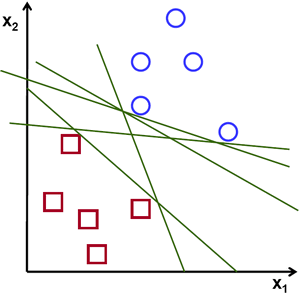

## What is SVM?

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well 

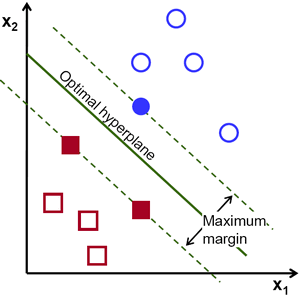

Support Vectors are simply the co-ordinates of individual observation. The SVM classifier is a frontier which best segregates the two classes (hyper-plane/ line).


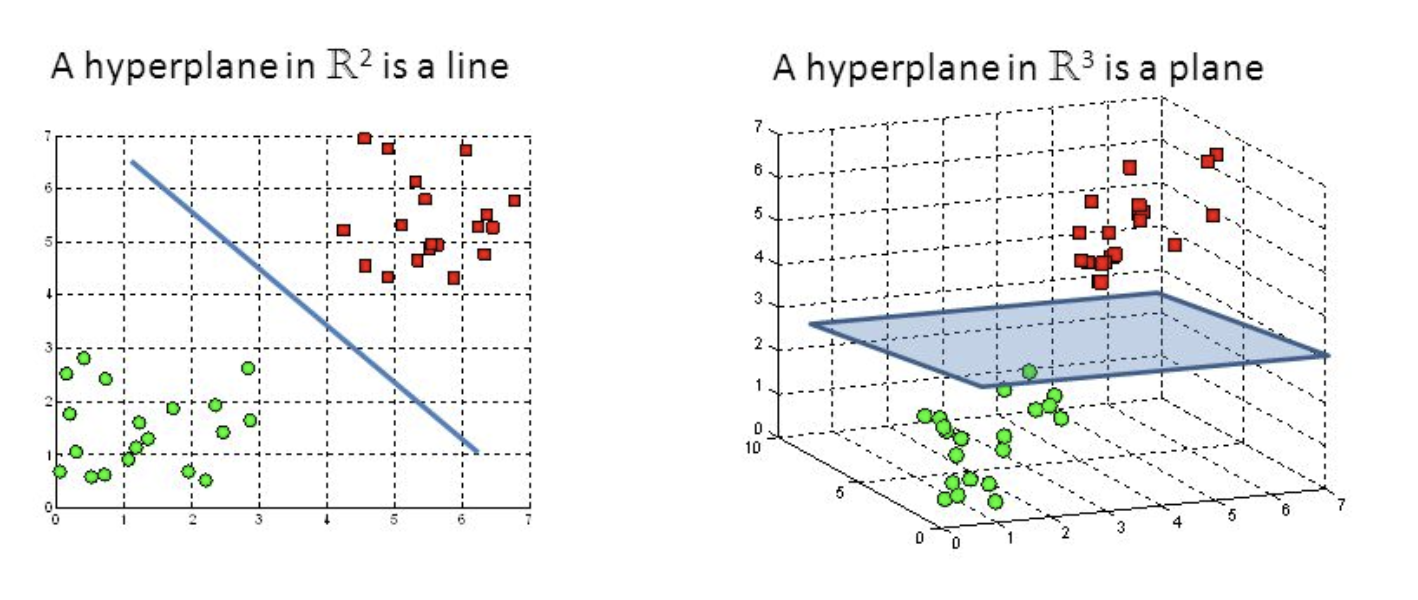


* Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

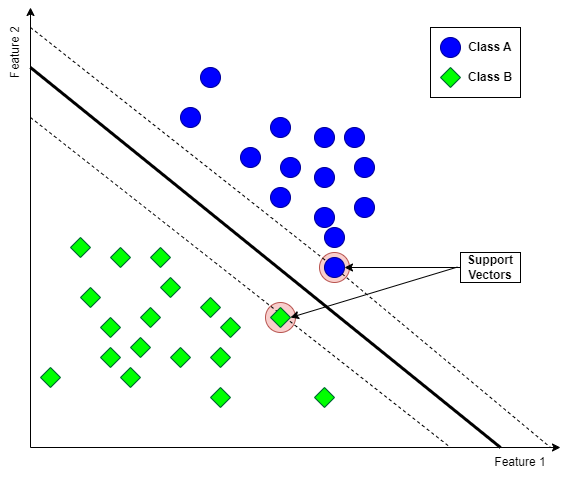

## About Dataset - Mobile Price Classification

* Mobile phones are the best selling electronic devices as people keep updating their cell phones whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a situation it is a very difficult task for someone who is planning to set up their own mobile phone business to decide what the price of the mobile should be.

* Mr Tehranipour wants to start his own mobile phone company and he wants to wage an uphill battle with big smartphone brands like Samsung and Apple. But he doesn’t know how to estimate the price of a mobile that can cover both marketing and manufacturing costs. So in this task, you don’t have to predict the actual prices of the mobiles but you have to predict the price range of the mobiles. 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

since our task is to classify the price range of mobile phones and not to predict the actual prices, so here I am going to train a classification model to classify the price range of mobile phones as:

    0 (low cost)
    1 (medium cost)
    2 (high cost)
    3 (very high cost)

In [ ]:
data = pd.read_csv('mobile_prices.csv')

In [ ]:
data.head()

# More on Dataset

Dataset as 21 features and 2000 entries. The meanings of the features are given below.

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data["price_range"].value_counts()

In [ ]:
corr = data.corr()
fig = plt.figure(figsize=(17,12))
heatmap = sns.heatmap(corr, cmap='Greens' , annot=True)
heatmap.set_title("Correlation ")

In [ ]:
corr.loc['price_range'].sort_values(ascending=False)

## Data PreProcessing

### Missing values

In [ ]:
data.isnull().sum()

### Splitting the dataset into the Training set and Test set

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Support Vector Machine

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [ ]:
from sklearn.svm import SVC
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
X_test[0]

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the SVM Model: ",accuracy)

In [ ]:
pd.crosstab(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))